# Esercizi 11 - Neural network regression

## 11.2 - Funzione trigonometrica in $\mathbb{R}^2$

Considero ora la funzione
$$
f(x,y)=\sin(x^2+y^2)
$$
con $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

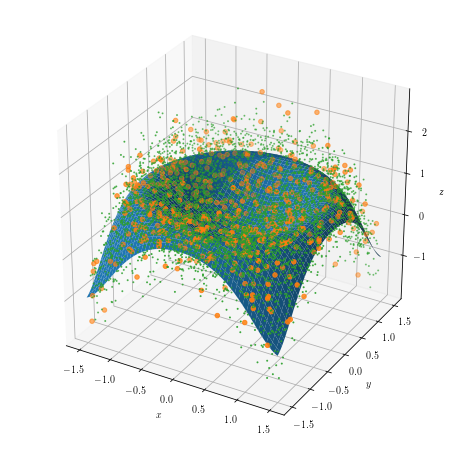

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LeakyReLU

from mpl_toolkits.mplot3d import Axes3D


# Ho avuto dei problemi a far funzionare tensorflow utilizzando più layer su jupyter,
# https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
# Ho utilizzato la soluzione trovata in quel link, non ho la più pallida idea di cosa sia ma funziona
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


def f(x,y):
    return np.sin(x**2+y**2)

ntrain=5000
nvalid=500

# generate training inputs
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, ntrain)
y_train = np.random.uniform(-1.5, 1.5, ntrain)

x_valid = np.random.uniform(-1.5, 1.5, nvalid)
y_valid = np.random.uniform(-1.5, 1.5, nvalid)


sigma = 0.5 # noise standard deviation



z_train=np.random.normal(f(x_train,y_train),sigma)
z_valid=np.random.normal(f(x_valid,y_valid),sigma)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
# plot training and target dataset

x_target = np.arange(-1.5, 1.5, 0.01)
y_target = np.arange(-1.5, 1.5, 0.01)
x_target, y_target = np.meshgrid(x_target, y_target)
z_target=f(x_target, y_target)
ax.plot_surface(x_target,y_target,z_target)
ax.scatter(x_valid,y_valid,z_valid,color="C1", label="Validation data")
ax.scatter(x_train,y_train,z_train,color="C2",s=1, label="Training data")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")


plt.show()





In blu è riportata la superficie corrispondente alla funzione a cui siamo interesati, in arancione sono riportati i dati di validazione mentre in verde sono riportati i dati di training ($\sigma=0.5$). In questo caso ho considerato $5000$ dati di training e $500$ di validazione.

Per la costruzione della rete neurale sono partito da quella che aveva dato i risultati migliori nell'esercizio 11.2, ossia quella con le tangenti iperboliche come funzioni di attivazione e l'optimizer Adam. Ho aumentato la complessità del modello arrivando a 209 parametri. Infine, ho notato che il modello migliora considerando una Leaky ReLU in un layer centrale (al posto di un'altra tangente iperbolica). 

In [2]:
model = tf.keras.Sequential()
model.add(Dense(8, input_shape=(2,), activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(8))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(4, activation="tanh"))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 209
Trainable params: 209
Non-trainable params: 0
__________________________________________________________

In [3]:
inputdata_train = np.vstack((x_train, y_train)).T
inputdata_valid = np.vstack((x_valid, y_valid)).T

history = model.fit(x=inputdata_train, y=z_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(inputdata_valid, z_valid))

Train on 5000 samples, validate on 500 samples
Epoch 1/100
5000/5000 [==============================] - 2s 349us/sample - loss: 0.4868 - mse: 0.4868 - val_loss: 0.4094 - val_mse: 0.4094
Epoch 2/100
5000/5000 [==============================] - 0s 88us/sample - loss: 0.3974 - mse: 0.3974 - val_loss: 0.4070 - val_mse: 0.4070
Epoch 3/100
5000/5000 [==============================] - 0s 87us/sample - loss: 0.3925 - mse: 0.3925 - val_loss: 0.3930 - val_mse: 0.3930
Epoch 4/100
5000/5000 [==============================] - 0s 90us/sample - loss: 0.3884 - mse: 0.3884 - val_loss: 0.3933 - val_mse: 0.3933
Epoch 5/100
5000/5000 [==============================] - 1s 101us/sample - loss: 0.3832 - mse: 0.3832 - val_loss: 0.3921 - val_mse: 0.3921
Epoch 6/100
5000/5000 [==============================] - 0s 82us/sample - loss: 0.3790 - mse: 0.3790 - val_loss: 0.3845 - val_mse: 0.3845
Epoch 7/100
5000/5000 [==============================] - 0s 90us/sample - loss: 0.3727 - mse: 0.3727 - val_loss: 0.3713 - v

5000/5000 [==============================] - 0s 78us/sample - loss: 0.2569 - mse: 0.2569 - val_loss: 0.2668 - val_mse: 0.2668
Epoch 60/100
5000/5000 [==============================] - 0s 79us/sample - loss: 0.2573 - mse: 0.2573 - val_loss: 0.2742 - val_mse: 0.2742
Epoch 61/100
5000/5000 [==============================] - 0s 75us/sample - loss: 0.2574 - mse: 0.2574 - val_loss: 0.2624 - val_mse: 0.2624
Epoch 62/100
5000/5000 [==============================] - 0s 72us/sample - loss: 0.2563 - mse: 0.2563 - val_loss: 0.2726 - val_mse: 0.2726
Epoch 63/100
5000/5000 [==============================] - 0s 83us/sample - loss: 0.2561 - mse: 0.2561 - val_loss: 0.2597 - val_mse: 0.2597
Epoch 64/100
5000/5000 [==============================] - 0s 84us/sample - loss: 0.2560 - mse: 0.2560 - val_loss: 0.2612 - val_mse: 0.2612
Epoch 65/100
5000/5000 [==============================] - 0s 79us/sample - loss: 0.2568 - mse: 0.2568 - val_loss: 0.2641 - val_mse: 0.2641
Epoch 66/100
5000/5000 [================

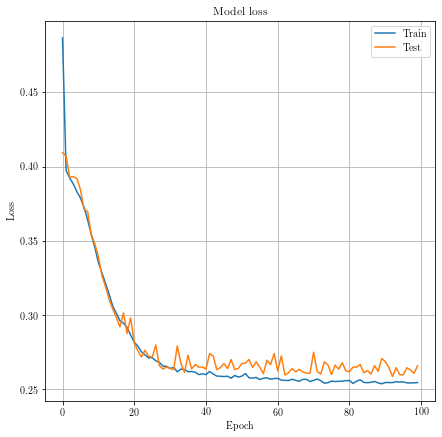

TRAINING DATA LOSS
0.25456795806884763
VALIDATION DATA LOSS
0.26601121127605437
TARGET DATA LOSS
0.005116723842918873


In [10]:
# Plot training & validation loss values
fig, ax1=plt.subplots(1,1, figsize=(7,7))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')
plt.show()


z_target_score=f(x_valid, y_valid)
score_valid = model.evaluate(inputdata_valid, z_valid, batch_size=32, verbose=0)
score_target = model.evaluate(inputdata_valid, z_target_score, batch_size=32, verbose=0)

print("TRAINING DATA LOSS")
print(history.history['loss'][-1])
print("VALIDATION DATA LOSS")
print(score_valid[0])
print("TARGET DATA LOSS")
print(score_target[0])


Come si può osservare, dopo circa $50$ epoche gli errori smettono di diminuire e si stabilizzano attorno a un errore di circa $0.25$, vicino a $\sigma^2$ del campionamento gaussiano (di solito si stabilizzavano dopo circa $60$ epoche, questa è stata una run abbastanza fortunata). C'è un leggero overfitting dato che l'errore di validazione è maggiore di quello di training.

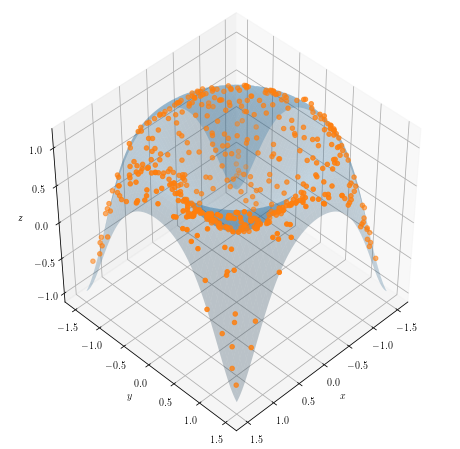

In [11]:
z_predicted=model.predict(inputdata_valid)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
# plot training and target dataset

ax.plot_surface(x_target,y_target,z_target,alpha=0.25)
ax.scatter(x_valid,y_valid,z_predicted,color="C1", label="Model")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

ax.view_init(45,45)

plt.show()

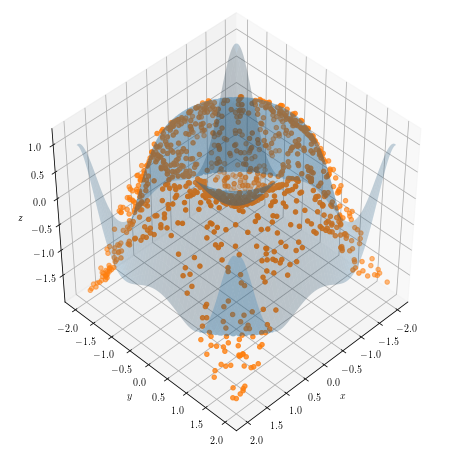

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x_out_model = np.random.uniform(-2,2, nvalid*2)
y_out_model = np.random.uniform(-2,2, nvalid*2)
inputdata_out = np.vstack((x_out_model, y_out_model)).T
z_predicted=model.predict(inputdata_valid)
ax.scatter(x_out_model,y_out_model,model.predict(inputdata_out),color="C1")

x_target_out = np.arange(-2,2, 0.01)
y_target_out = np.arange(-2,2, 0.01)
x_target_out, y_target_out = np.meshgrid(x_target_out, y_target_out)
z_target_out=f(x_target_out, y_target_out)

ax.plot_surface(x_target_out,y_target_out,z_target_out,alpha=0.25)



ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
ax.view_init(45,45)

plt.show()

Quando si considerano degli intervalli più grandi rispetto a quelli di training ovviamente il modello non predice più i valori corretti. I maggiori problemi in questo caso si riscontrano verso i vertici del cubo in cui è rappresentata la funzione: ovviamente il modello non può immaginarsi che la funzione riprenda a crescere in quelle zone, ma fino a quando la funzione decresce riesce comunque ad approssimarla bene. Un'altra zona che ho notato essere particolarmente critica corrisponde agli spigoli del cubo perpendicolari all'asse $z$, dove (si veda il grafico precedente) la funzione originale veniva "tagliata" dal box.